In [1]:
#test LSTM  input 4D  open high low close
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data=pd.read_csv('EU_train.csv')
print(data.head())
data.shape

         Date     Open     High      Low    Close  Volume
0  2017.01.15  1.06002  1.06350  1.05915  1.06268    3431
1  2017.01.16  1.06264  1.06335  1.05786  1.06018   55430
2  2017.01.17  1.06022  1.07176  1.06006  1.06962   72002
3  2017.01.18  1.06965  1.07120  1.06239  1.06277   64558
4  2017.01.19  1.06281  1.06760  1.05885  1.06589   73906


(1002, 6)

In [3]:
train_data=data.iloc[:,1:5].values
train_data

array([[1.06002, 1.0635 , 1.05915, 1.06268],
       [1.06264, 1.06335, 1.05786, 1.06018],
       [1.06022, 1.07176, 1.06006, 1.06962],
       ...,
       [1.08455, 1.08548, 1.07725, 1.08005],
       [1.08089, 1.08186, 1.07995, 1.08051],
       [1.0805 , 1.08347, 1.0768 , 1.07985]])

In [4]:
X_train=[]
Y_train=[]
windows=20

for i in range(windows, len(train_data)):
        X_train.append(train_data[i-windows:i,:])
        Y_train.append(train_data[i,:])

print(X_train)
print('Y=============',Y_train)

[array([[1.06002, 1.0635 , 1.05915, 1.06268],
       [1.06264, 1.06335, 1.05786, 1.06018],
       [1.06022, 1.07176, 1.06006, 1.06962],
       [1.06965, 1.0712 , 1.06239, 1.06277],
       [1.06281, 1.0676 , 1.05885, 1.06589],
       [1.06595, 1.07089, 1.06247, 1.06998],
       [1.07071, 1.07161, 1.06941, 1.07122],
       [1.07108, 1.07719, 1.07059, 1.07586],
       [1.07571, 1.07741, 1.07199, 1.07277],
       [1.07278, 1.0769 , 1.07108, 1.07519],
       [1.07521, 1.07649, 1.06572, 1.06829],
       [1.06829, 1.07242, 1.06579, 1.06923],
       [1.0717 , 1.07306, 1.07078, 1.07164],
       [1.07164, 1.07392, 1.06199, 1.07071],
       [1.07072, 1.08114, 1.06844, 1.08006],
       [1.07997, 1.08067, 1.07307, 1.0765 ],
       [1.07645, 1.08281, 1.07556, 1.0761 ],
       [1.07612, 1.07967, 1.07099, 1.07843],
       [1.07938, 1.07979, 1.07776, 1.07819],
       [1.07819, 1.0788 , 1.07052, 1.07426]]), array([[1.06264, 1.06335, 1.05786, 1.06018],
       [1.06022, 1.07176, 1.06006, 1.06962],
       

In [5]:
X_train, Y_train = np.array(X_train), np.array(Y_train)
print(X_train.shape)
print(Y_train.shape)

X_train=np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))

print(X_train.shape[0])
print(X_train.shape[1])
print(X_train.shape[2])

print(X_train)
print(Y_train)

(982, 20, 4)
(982, 4)
982
20
4
[[[1.06002 1.0635  1.05915 1.06268]
  [1.06264 1.06335 1.05786 1.06018]
  [1.06022 1.07176 1.06006 1.06962]
  ...
  [1.07612 1.07967 1.07099 1.07843]
  [1.07938 1.07979 1.07776 1.07819]
  [1.07819 1.0788  1.07052 1.07426]]

 [[1.06264 1.06335 1.05786 1.06018]
  [1.06022 1.07176 1.06006 1.06962]
  [1.06965 1.0712  1.06239 1.06277]
  ...
  [1.07938 1.07979 1.07776 1.07819]
  [1.07819 1.0788  1.07052 1.07426]
  [1.07425 1.0744  1.06555 1.06781]]

 [[1.06022 1.07176 1.06006 1.06962]
  [1.06965 1.0712  1.06239 1.06277]
  [1.06281 1.0676  1.05885 1.06589]
  ...
  [1.07819 1.0788  1.07052 1.07426]
  [1.07425 1.0744  1.06555 1.06781]
  [1.06781 1.07133 1.06402 1.0691 ]]

 ...

 [[1.13135 1.13661 1.12496 1.12609]
  [1.12607 1.13329 1.1055  1.11822]
  [1.11824 1.12208 1.10548 1.11024]
  ...
  [1.10285 1.10423 1.09263 1.10255]
  [1.10257 1.10357 1.09025 1.0951 ]
  [1.09511 1.09639 1.08203 1.08457]]

 [[1.12607 1.13329 1.1055  1.11822]
  [1.11824 1.12208 1.10548 1.11

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


ImportError: cannot import name 'export_saved_model' from 'tensorflow.python.keras.saving.saved_model' (C:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\keras\saving\saved_model\__init__.py)

In [8]:
model = Sequential()
model.add(LSTM(units=50, return_sequences = True, input_shape= (X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(X_train.shape[2]))   #output 4

model.compile(optimizer='adam', loss='mean_squared_error')
#model.fit(X_train, Y_train, epochs=10, batchsize =3)
model.fit(X_train, Y_train, epochs=10)

NameError: name 'Sequential' is not defined

In [122]:
Z = model.predict(X_train)
model.save('LSTM_4D_timeStamp20_ep1000.h5')

In [124]:
"""
#print('X1=',X_train[0:3,:,:4])
print('X=',X_train[1:2,-1:,:4])
print('X=',X_train[2:3,-1:,:4])
#print(X_train[1:3,:,:4])
print('Z=',Z[:2,:])
"""
print('X1=',X_train[1:3,19:20,:4])
#print('X=',X_train[1:2,-1:,:4])
#print('X=',X_train[2:3,-1:,:4])
#print(X_train[1:3,:,:4])
print('Z=',Z[:2,:])

print(X_train.shape)
print(Z.shape)

X1= [[[1.07425 1.0744  1.06555 1.06781]]

 [[1.06781 1.07133 1.06402 1.0691 ]]]
Z= [[1.0717843 1.0743002 1.0696164 1.0721099]
 [1.0661647 1.0685668 1.0640241 1.0664452]]
(982, 20, 4)
(982, 4)


In [125]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_53 (LSTM)               (None, 20, 50)            11000     
_________________________________________________________________
dropout_53 (Dropout)         (None, 20, 50)            0         
_________________________________________________________________
lstm_54 (LSTM)               (None, 20, 50)            20200     
_________________________________________________________________
dropout_54 (Dropout)         (None, 20, 50)            0         
_________________________________________________________________
lstm_55 (LSTM)               (None, 20, 50)            20200     
_________________________________________________________________
dropout_55 (Dropout)         (None, 20, 50)            0         
_________________________________________________________________
lstm_56 (LSTM)               (None, 50)              

In [129]:
from keras.models import load_model

In [130]:
model1 = load_model('LSTM_4D_timeStamp20_ep1000.h5')

In [137]:
Z = model1.predict(X_train)
print(Z.shape)
print(Z)
print(type(Z))
print(Y_train)

(982, 4)
[[1.0717843 1.0743002 1.0696164 1.0721099]
 [1.0661647 1.0685668 1.0640241 1.0664452]
 [1.0657936 1.0682143 1.0636816 1.0661082]
 ...
 [1.0832993 1.0857826 1.080926  1.0835003]
 [1.0779871 1.0804121 1.0756818 1.0782042]
 [1.0775555 1.0800337 1.0753013 1.0778388]]
<class 'numpy.ndarray'>
[[1.07425 1.0744  1.06555 1.06781]
 [1.06781 1.07133 1.06402 1.0691 ]
 [1.06909 1.0709  1.06505 1.06569]
 ...
 [1.08455 1.08548 1.07725 1.08005]
 [1.08089 1.08186 1.07995 1.08051]
 [1.0805  1.08347 1.0768  1.07985]]


In [173]:
OpenZ = Z[:,0:1]
HighZ = Z[:,1:2]
LowZ = Z[:,2:3]
CloseZ = Z[:,3:4]
OpenX = Y_train[:,0:1]
HighX= Y_train[:,1:2]
LowX= Y_train[:,2:3]
CloseX= Y_train[:,3:4]

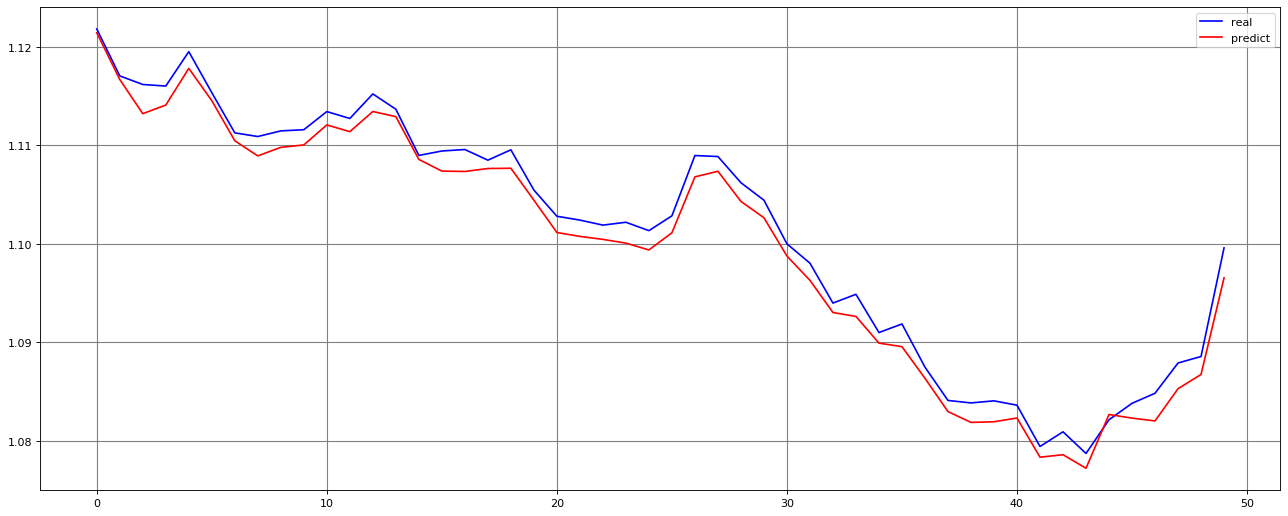

In [191]:
#close
space = 50
start = 900
stop = start + space
plt.figure(figsize=[20,8],dpi=80)
plt.plot(OpenX[start:stop], 'b')
plt.plot(OpenZ[start:stop], 'r')
plt.grid(color='grey', linestyle='-', linewidth=1)
plt.legend(['real', 'predict'])
plt.show()

In [202]:
# pre data for PREDICT
data1=pd.read_csv('EU_test.csv')
Predict_data=data1.iloc[:,1:5].values
print(Predict_data.shape)
#print(Predict_data)

X_predict=[]
Y_predict=[]
windows=20
for i in range(windows, len(Predict_data)):
        X_predict.append(Predict_data[i-windows:i,:])
        Y_predict.append(Predict_data[i,:])
X_predict, Y_predict = np.array(X_predict), np.array(Y_predict)

print(X_predict.shape)
#print(X_predict)

X_predict =np.reshape(X_predict, (X_predict.shape[0], X_predict.shape[1], X_predict.shape[2]))

(30, 4)
(10, 20, 4)


In [204]:
model2 = load_model('LSTM_4D_timeStamp20_ep1000.h5')
Z = model2.predict(X_predict)

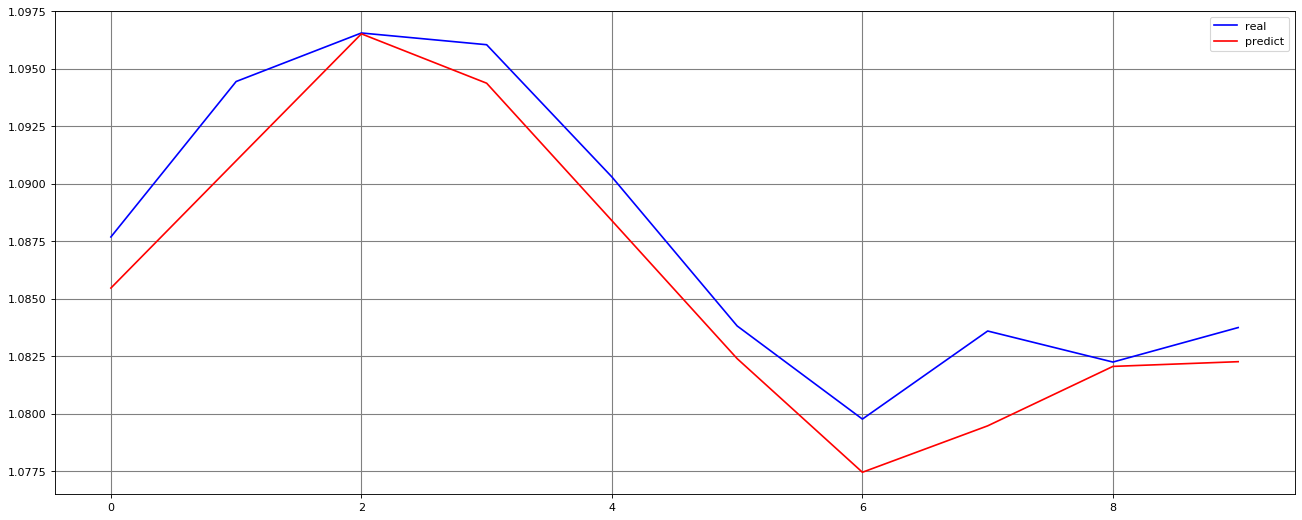

In [205]:
OpenZ = Z[:,0:1]
HighZ = Z[:,1:2]
LowZ = Z[:,2:3]
CloseZ = Z[:,3:4]
OpenX = Y_predict[:,0:1]
HighX= Y_predict[:,1:2]
LowX= Y_predict[:,2:3]
CloseX= Y_predict[:,3:4]

space = 30
start = 0
stop = start + space
plt.figure(figsize=[20,8],dpi=80)
plt.plot(OpenX[start:stop], 'b')
plt.plot(OpenZ[start:stop], 'r')
plt.grid(color='grey', linestyle='-', linewidth=1)
plt.legend(['real', 'predict'])
plt.show()

In [ ]:
# plot candle stick